# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [149]:
# 3 observable trends based on the data analysis below
    # 1) As shown in the latitude vs. temperature plot, higher latitudes, especially those > 40 degrees are colder than those closer to the equator.
    # 2) There does not appear to be any clear relationship between latitude and cloudiness.
    # 3) As shown in the latitude vs. wind speed plot, outliers (very high winds) appear more likely to occur at extreme latitudes (far north or far south). However, additional data/sampling is recommended before concluding this is true definitively.

In [150]:
# Code below in this cell provided as starter code
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import csv
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [151]:
# Code below in this cell provided as starter code
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [152]:
# Per Weather API documentation, use the URL structure below...
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}&units=imperial
# ^Need to switch from standard units to imperial as well

url = "http://api.openweathermap.org/data/2.5/weather"
    
url_w_units_api = url + "?units=imperial&appid=" + weather_api_key 

# Define lists of weather related data to retieve via calls
temp = []
city_names = []
lat = []
long = []
cloud = []
wind = []
humidity = []
date = []
country = []

print("---------------")
print("Beginning Data Retrieval")
print("---------------")

city_counter = 0

# Structure query URL based on API documentation
for city in cities:
    query_url = url_w_units_api + "&q=" + city
    response = requests.get(query_url)
    
    # print(query_url)
    
    # Need to account for handful of city not found 404 errors below in append
    if response.status_code != 404:
    
    # append all lists - looked at example url http://api.openweathermap.org/data/2.5/weather?q=london&appid=ecfdfe218ded7750b5efdda70abe2d18 to structure append mapping
        response = response.json()
        temp.append(response["main"]["temp_max"])
        city_names.append(city)
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        humidity.append(response["main"]["humidity"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        
        print("Processing Record " + str(city_counter) + " | " + city)
        
        city_counter = city_counter + 1
        
    else: print("City Not Found")
                
print("---------------")

---------------
Beginning Data Retrieval
---------------
Processing Record 0 | bonthe
Processing Record 1 | mao
City Not Found
Processing Record 2 | heishan
Processing Record 3 | asau
Processing Record 4 | alofi
Processing Record 5 | lebu
Processing Record 6 | norman wells
Processing Record 7 | mount pleasant
Processing Record 8 | monte escobedo
City Not Found
Processing Record 9 | ribeira grande
Processing Record 10 | saskylakh
City Not Found
Processing Record 11 | tasiilaq
Processing Record 12 | gat
Processing Record 13 | shaoyang
Processing Record 14 | mayumba
Processing Record 15 | shambu
Processing Record 16 | havre-saint-pierre
Processing Record 17 | ushuaia
Processing Record 18 | castro
Processing Record 19 | yellowknife
Processing Record 20 | kapaa
Processing Record 21 | griffith
Processing Record 22 | cherskiy
Processing Record 23 | port blair
City Not Found
Processing Record 24 | tibana
Processing Record 25 | mataura
Processing Record 26 | sakaiminato
Processing Record 27 | k

Processing Record 240 | port macquarie
Processing Record 241 | januaria
Processing Record 242 | puerto baquerizo moreno
Processing Record 243 | gosainganj
Processing Record 244 | newport
Processing Record 245 | gladstone
Processing Record 246 | tiksi
Processing Record 247 | port alfred
Processing Record 248 | soyo
Processing Record 249 | zaysan
Processing Record 250 | roma
Processing Record 251 | hami
Processing Record 252 | medicine hat
Processing Record 253 | hovd
Processing Record 254 | eyl
Processing Record 255 | saint-pierre
Processing Record 256 | bathsheba
City Not Found
Processing Record 257 | acapulco
Processing Record 258 | guerrero negro
Processing Record 259 | pevek
Processing Record 260 | sao miguel do araguaia
Processing Record 261 | porto novo
Processing Record 262 | san patricio
Processing Record 263 | ostrovnoy
Processing Record 264 | lasa
Processing Record 265 | yumen
Processing Record 266 | shorapur
Processing Record 267 | wewak
Processing Record 268 | atbasar
Proces

Processing Record 479 | laje
Processing Record 480 | liverpool
Processing Record 481 | gweta
Processing Record 482 | huntley
Processing Record 483 | buchanan
Processing Record 484 | murray bridge
Processing Record 485 | maceio
Processing Record 486 | sorland
Processing Record 487 | shawnee
Processing Record 488 | mago
Processing Record 489 | yamada
Processing Record 490 | jiaonan
Processing Record 491 | okhotsk
Processing Record 492 | mutoko
Processing Record 493 | conceicao do araguaia
Processing Record 494 | savonlinna
Processing Record 495 | sosnovo-ozerskoye
Processing Record 496 | shumskiy
Processing Record 497 | marmande
Processing Record 498 | macau
City Not Found
Processing Record 499 | valentin gomez farias
Processing Record 500 | toora-khem
Processing Record 501 | esna
Processing Record 502 | point pedro
City Not Found
Processing Record 503 | pocone
Processing Record 504 | kahului
Processing Record 505 | nchelenge
Processing Record 506 | ferrol
Processing Record 507 | ipixuna

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [153]:
# Put the data into a dataframe
weather_df = pd.DataFrame({"City": city_names, "Lat": lat, "Lng": long, "Max Temp": temp, "Humidity": humidity, "Cloudiness": cloud, "Wind Speed": wind, "Country": country, "Date": date})
weather_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bonthe,7.53,-12.51,86.63,53,100,3.58,SL,1608210712
1,mao,39.89,4.27,62.60,88,75,11.41,ES,1608210712
2,heishan,41.69,122.11,16.90,87,0,5.91,CN,1608210712
3,asau,46.43,26.40,37.40,93,90,3.36,RO,1608210260
4,alofi,-19.06,-169.92,75.20,94,100,1.12,NU,1608210712
5,lebu,-37.62,-73.65,58.95,60,0,13.33,CL,1608210712
6,norman wells,65.28,-126.83,-50.80,71,20,2.24,CA,1608210247
7,mount pleasant,32.79,-79.86,42.01,100,90,9.17,US,1608210421
8,monte escobedo,22.30,-103.58,36.97,78,0,2.08,MX,1608210712
9,ribeira grande,38.52,-28.70,66.20,88,75,24.16,PT,1608210712


In [154]:
# Write to csv
weather_df.to_csv("cities.csv", index=False, header=True)

In [155]:
# Use describe to summarize the stats below
weather_df_stats = weather_df[["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"]].describe()
weather_df_stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,21.598576,17.484569,50.816977,73.400703,58.001757,8.752144,1.608211e+09
std,32.612145,90.928555,31.708604,20.430690,39.810665,6.114400,1.513003e+02
min,-54.800000,-179.170000,-50.800000,8.000000,0.000000,0.580000,1.608210e+09
25%,-5.200000,-65.340000,28.400000,64.000000,20.000000,4.470000,1.608211e+09
50%,27.980000,24.730000,57.990000,79.000000,75.000000,6.930000,1.608211e+09
75%,47.890000,97.030000,77.670000,88.000000,97.000000,11.430000,1.608211e+09
max,78.220000,179.320000,101.820000,100.000000,100.000000,34.450000,1.608211e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [156]:
# max is 100, so skip

In [157]:
#  Get the indices of cities that have humidity over 100%.
# none over 100%, so skip

In [158]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# none over 100%, so skip

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

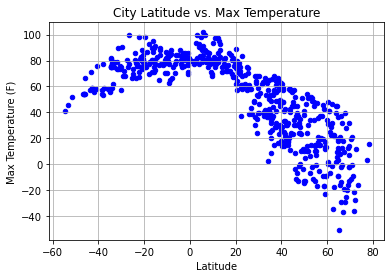

In [159]:
weather_df.plot(kind = "scatter", x = "Lat", y = "Max Temp", c = "Blue")

# formatting, titles, etc.
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")

# save as PNG
plt.savefig("Lat_vs_MaxTemp.png")

# the code above is plotting latitude values from our dataframe against max temp values from our dataframe on a scatterplot, aiding in identifying any relationship(s) between the variables.

## Latitude vs. Humidity Plot

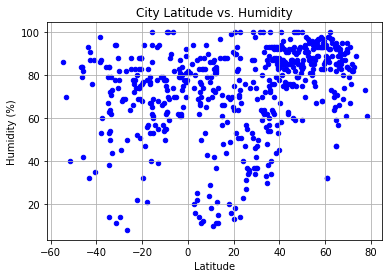

In [160]:
weather_df.plot(kind = "scatter", x = "Lat", y = "Humidity", c = "Blue")

# formatting, titles, etc.
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")

# save as PNG
plt.savefig("Lat_vs_Humidity.png")

# the code above is plotting latitude values from our dataframe against humidity values from our dataframe on a scatterplot, aiding in identifying any relationship(s) between the variables.

## Latitude vs. Cloudiness Plot

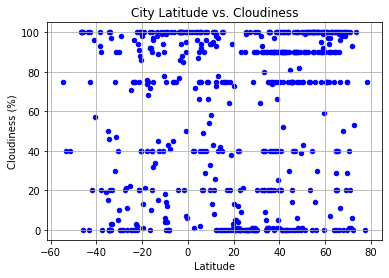

In [161]:
weather_df.plot(kind = "scatter", x = "Lat", y = "Cloudiness", c = "Blue")

# formatting, titles, etc.
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")

# save as PNG
plt.savefig("Lat_vs_Cloud.png")

# the code above is plotting latitude values from our dataframe against cloudiness values from our dataframe on a scatterplot, aiding in identifying any relationship(s) between the variables.

## Latitude vs. Wind Speed Plot

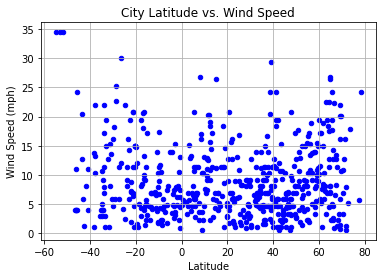

In [162]:
weather_df.plot(kind = "scatter", x = "Lat", y = "Wind Speed", c = "Blue")

# formatting, titles, etc.
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")

# save as PNG
plt.savefig("Lat_vs_Wind.png")

# the code above is plotting latitude values from our dataframe against wind speed values from our dataframe on a scatterplot, aiding in identifying any relationship(s) between the variables.

## Linear Regression

In [163]:
# Seperate out the hemispheres into different dataframes
weather_df_N = weather_df[weather_df["Lat"]>=0]
weather_df_S = weather_df[weather_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.7157271610454037


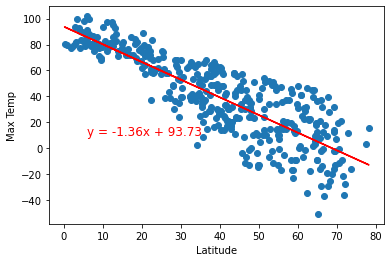

In [164]:
x_values = weather_df_N["Lat"]

y_values = weather_df_N["Max Temp"]

# Use linregress module as shown in class examples
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

# I see in the N Hemisphere that temps tend to drop as latitude increases. R^2 is above .5, so this is a pretty clear trend.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.3666643679058822


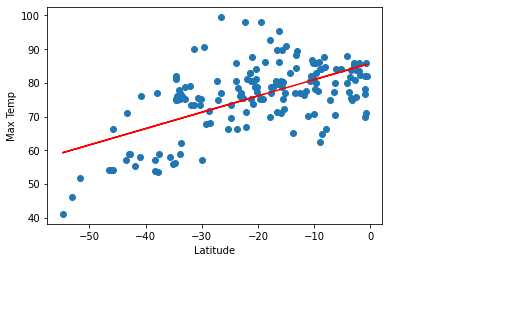

In [165]:
x_values = weather_df_S["Lat"]

y_values = weather_df_S["Max Temp"]

# Use linregress module as shown in class examples
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

# I see in the S Hemisphere that temps tend to drop slightly as latitude decreases. It is not as noticeable as in the N Hemisphere though.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.17120880116452997


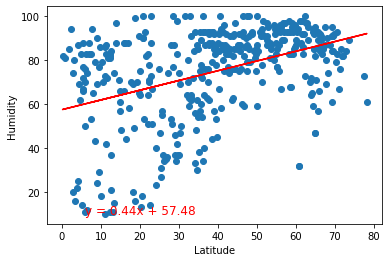

In [166]:
x_values = weather_df_N["Lat"]

y_values = weather_df_N["Humidity"]

# Use linregress module as shown in class examples
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

# I do not see any obvious relationships between latitude and humidity based on the below.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.01163665379448082


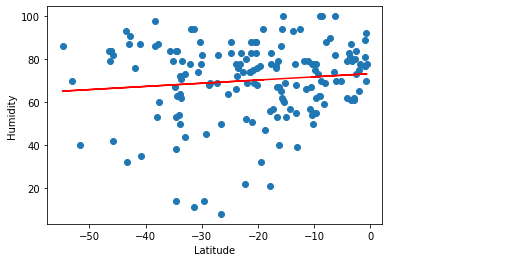

In [167]:
x_values = weather_df_S["Lat"]

y_values = weather_df_S["Humidity"]

# Use linregress module as shown in class examples
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

# I do not see any obvious relationships between latitude and humidity based on the below.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.029445369828502623


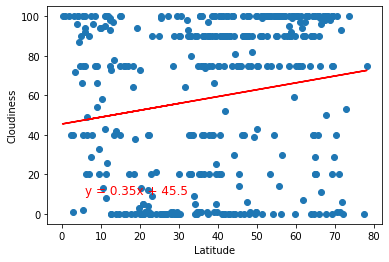

In [168]:
x_values = weather_df_N["Lat"]

y_values = weather_df_N["Cloudiness"]

# Use linregress module as shown in class examples
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

# I do not see any obvious relationships between latitude and cloudiness based on the below.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.02704851569733229


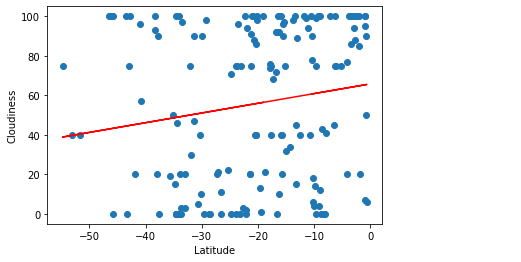

In [169]:
x_values = weather_df_S["Lat"]

y_values = weather_df_S["Cloudiness"]

# Use linregress module as shown in class examples
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

# I do not see any obvious relationships between latitude and cloudiness based on the below.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.011470242707457366


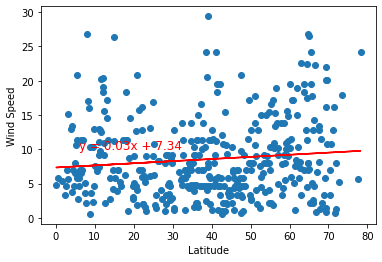

In [170]:
x_values = weather_df_N["Lat"]

y_values = weather_df_N["Wind Speed"]

# Use linregress module as shown in class examples
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

# I do not see any obvious relationships between latitude and wind speed based on the below. However, outliers (high winds) appear to be more frequent at extreme latitudes.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.10959033498796082


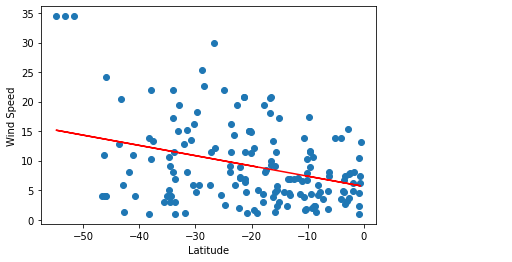

In [171]:
x_values = weather_df_S["Lat"]

y_values = weather_df_S["Wind Speed"]

# Use linregress module as shown in class examples
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

# I do not see any obvious relationships between latitude and wind speed based on the below. However, outliers (high winds) appear to be more frequent at extreme latitudes.